# Basic consepts in network science

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

## Definitions:

$N$ - The number of nodes, represents the number of components in the system.

$L$ - The number of links (edges), represents the total number of interactions between the nodes.

#### Directed Networks
A **directed network** is a set of nodes connected by edges, where the edges have a direction. In a directed network, the link from node A to node B is different from the link from node B to node A. Directed networks are often used to represent relationships where direction matters, such as in citation networks, and social media follower relationships.

#### Undirected Networks
An **undirected network** is a set of nodes connected by links, where the links do not have a direction. In an undirected network, the link between node A and node B is the same as the link between node B and node A. Undirected networks are often used to represent relationships where direction does not matter, such as in social networks (e.g., friendship networks).

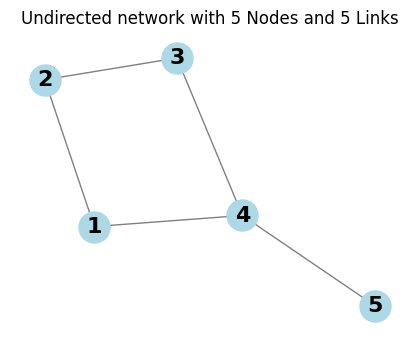

In [57]:
# Create a graph
G = nx.Graph()

# Add 5 nodes
G.add_nodes_from([1, 2, 3, 4, 5])

# Add 5 links
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (1, 4)]
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(4, 3))
nx.draw(G, with_labels=True, node_color='lightblue',
        node_size=500, edge_color='gray', font_size=16,
        font_weight='bold')
plt.title('Undirected network with 5 Nodes and 5 Links')
plt.show()

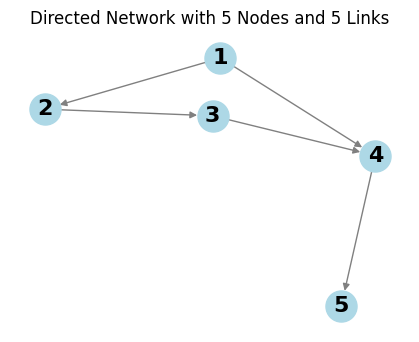

In [3]:
# Create a directed graph
G = nx.DiGraph()

# Add 5 nodes
G.add_nodes_from([1, 2, 3, 4, 5])

# Add 5 directed links
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (1, 4)]
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(4, 3))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500,
        edge_color='gray', font_size=16, font_weight='bold', arrows=True)
plt.title('Directed Network with 5 Nodes and 5 Links')
plt.show()

## Degree, Average Degree and Degree Distribution

A key property of each node is its degree, representing the number of links it has to other nodes.

### Degree

We denote with $k_i$ the degree of the $i$-th node in the network.

#### Undirected network

In an undirected network, the total number of links, $L$, can be expressed as the sum of the node degrees:

$$
L = \frac{1}{2} \sum_{i=1}^{N} k_i
$$

#### Directed network

In directed networks, we distinguish between incoming degree, $k_i^{\text{in}}$, representing the number of links that point to node $i$, and outgoing degree, $k_i^{\text{out}}$, representing the number of links that point from node $i$ to other nodes. Finally, a node’s total degree, $k_i$, is given by

$$
k_i = k_i^{\text{in}} + k_i^{\text{out}}
$$

The total number of links, $L$, can be expressed as follows:

$$
L = \sum_{i=1}^{N} k_i^{\text{in}} = \sum_{i=1}^{N} k_i^{\text{out}}
$$

### Average Degree

#### Undirected network

For undirected networks, the average degree $\langle k \rangle$ can be expressed as:

$$
\langle k \rangle = \frac{1}{N} \sum_{i=1}^{N} k_i = \frac{2L}{N}
$$

#### Directed network

The average degree of a directed network is

$$
\langle k^{\text{in}} \rangle = \frac{1}{N} \sum_{i=1}^{N} k_i^{\text{in}} = \langle k^{\text{out}} \rangle = \frac{1}{N} \sum_{i=1}^{N} k_i^{\text{out}} = \frac{L}{N}
$$

### Degree Distribution

The degree distribution, $p_k$, provides the probability that a randomly selected node in the network has degree $k$. Since $p_k$ is a probability, it must be normalized, i.e.

$$
\sum_{k=1}^{\infty} p_k = 1
$$

For example, the average degree of a network can be written as

$$
\langle k \rangle = \sum_{k=0}^{\infty} k p_k
$$

For a network with $N$ nodes, the degree distribution is the normalized histogram given by

$$
p_k = \frac{N_k}{N}
$$

where $N_k$ is the number of degree-$k$ nodes.

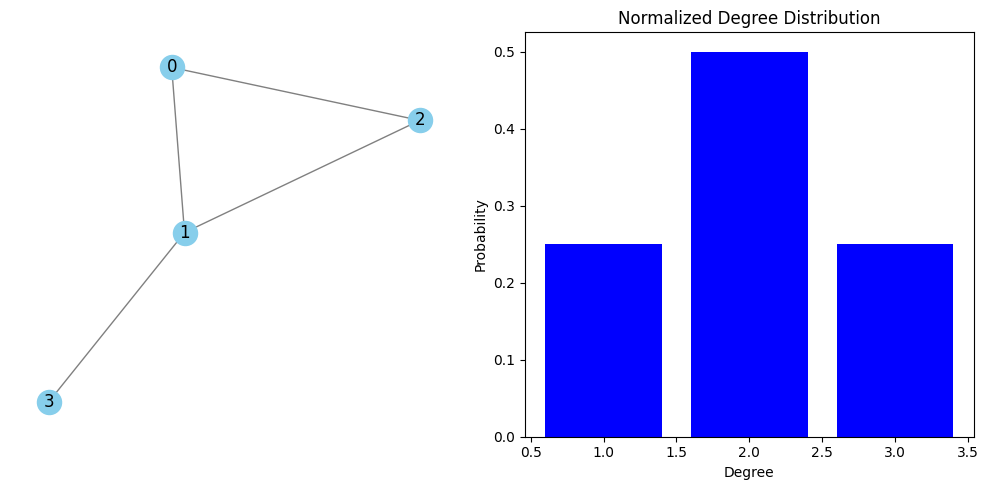

In [4]:
G = nx.Graph()
edges = [(0, 1), (0, 2), (1, 2), (1, 3)]
G.add_edges_from(edges)

plt.figure(figsize=(10, 5))

plt.subplot(121)
nx.draw(G, with_labels=True, node_size=300, node_color="skyblue", edge_color="gray")

degrees = [G.degree(n) for n in G.nodes()]
unique_degrees = list(set(degrees))
degree_count = [degrees.count(d) for d in unique_degrees]

# Normalize the degree distribution
total_nodes = len(G.nodes())
degree_distribution = [count / total_nodes for count in degree_count]

plt.subplot(122)
plt.bar(unique_degrees, degree_distribution, width=0.80, color="b")
plt.title("Normalized Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Probability")

plt.tight_layout()
plt.show()

## Adjacency Matrix

The adjacency matrix of a directed network of $N$ nodes has $N$ rows and $N$ columns, its elements being:

$$
A_{ij} = 1 \text{ if there is a link pointing from node } j \text{ to node } i
$$

$$
A_{ij} = 0 \text{ if nodes } i \text{ and } j \text{ are not connected to each other}
$$

The adjacency matrix of an undirected network has two entries for each link, e.g., link $(1, 2)$ is represented as $A_{12} = 1$ and $A_{21} = 1$. Hence, the adjacency matrix of an undirected network is symmetric, $A_{ij} = A_{ji}$.

The degree $k_i$ of node $i$ can be directly obtained from the elements of the adjacency matrix. For undirected networks, a node’s degree is a sum over either the rows or the columns of the matrix, i.e.

$$
k_i = \sum_{j=1}^{N} A_{ji} = \sum_{i=1}^{N} A_{ji} \quad 
$$

For directed networks, the sums over the adjacency matrix’ rows and columns provide the incoming and outgoing degrees, respectively:

$$
k_i^{in} = \sum_{j=1}^{N} A_{ij}, \quad k_i^{out} = \sum_{j=1}^{N} A_{ji} \quad 
$$

Given that in an undirected network the number of outgoing links equals the number of incoming links, we have:

$$
2L = \sum_{i=1}^{N} k_i^{in} = \sum_{i=1}^{N} k_i^{out} = \sum_{ij}^{N} A_{ij} \quad 
$$

The number of nonzero elements of the adjacency matrix is $2L$, or twice the number of links. Indeed, an undirected link connecting nodes $i$ and $j$ appears in two entries: $A_{ij} = 1$, a link pointing from node $j$ to node $i$, and $A_{ji} = 1$, a link pointing from $i$ to $j$.

#### Weighted networks

For weighted networks, the elements of the adjacency matrix carry the weight of the link as

$$
A_{ij} = w_{ij}
$$

For example, the matrix $A$ in the generalized Lotka-Volterra model represents a weighted network.

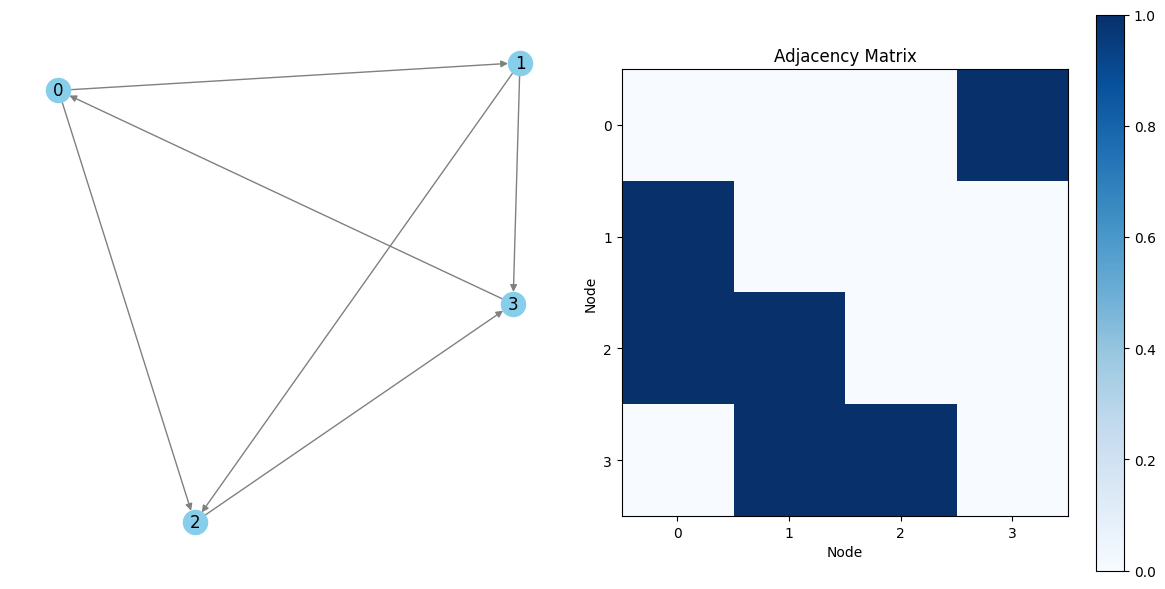

In [5]:
G_directed = nx.DiGraph()
edges_directed = [(0, 1), (0, 2), (1, 2), (1, 3), (3, 0), (2, 3)]
G_directed.add_edges_from(edges_directed)

plt.figure(figsize=(12, 6))

plt.subplot(121)
nx.draw(G_directed, with_labels=True, node_size=300, node_color="skyblue", edge_color="gray", arrows=True)

adj_matrix = nx.adjacency_matrix(G_directed).todense().T
plt.subplot(122)
plt.imshow(adj_matrix, cmap='Blues', interpolation='none')
plt.colorbar()
plt.title("Adjacency Matrix")
plt.xlabel("Node")
plt.ylabel("Node")
plt.xticks(ticks=range(len(G_directed.nodes())), labels=range(len(G_directed.nodes())))
plt.yticks(ticks=range(len(G_directed.nodes())), labels=range(len(G_directed.nodes())))

plt.tight_layout()
plt.show()

## Clustering Coefficient

The clustering coefficient captures the degree to which the neighbors of a given node link to each other. For a node $i$ with degree $k_i$, the local clustering coefficient is defined as

$$
C_i = \frac{2L_i}{k_i(k_i - 1)} \quad 
$$

where $L_i$ represents the number of links between the $k_i$ neighbors of node $i$. Note that $C_i$ is between 0 and 1:

- $C_i = 0$ if none of the neighbors of node $i$ link to each other.
- $C_i = 1$ if the neighbors of node $i$ form a complete graph, i.e., they all link to each other.

$C_i$ is the probability that two neighbors of a node link to each other. Consequently, $C = 0.5$ implies that there is a 50% chance that two neighbors of a node are linked.

In summary, $C_i$ measures the network’s local link density: The more densely interconnected the neighborhood of node $i$, the higher its local clustering coefficient.

The degree of clustering of a whole network is captured by the average clustering coefficient, $\langle C \rangle$, representing the average of $C_i$ over all nodes $i = 1, \ldots, N$,

$$
\langle C \rangle = \frac{1}{N} \sum_{i=1}^{N} C_i
$$

Clustering coefficient of node 1: 0.5


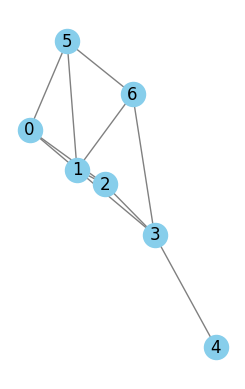

In [6]:
G = nx.Graph()
edges = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (0, 5), (1, 5), (5, 6), (6, 3), (6, 1)]
G.add_edges_from(edges)

plt.subplot(121)
nx.draw(G, with_labels=True, node_size=300, node_color="skyblue", edge_color="gray")

node = 1
clustering_coefficient = nx.clustering(G, node)
print(f"Clustering coefficient of node {node}: {clustering_coefficient}")

## The Random Network Model

#### Defining Random Networks

There are two definitions of a random network:

1. **G(N, L) Model:** $N$ labeled nodes are connected with $L$ randomly placed links.
2. **G(N, p) Model:** Each pair of $N$ labeled nodes is connected with probability $p$.

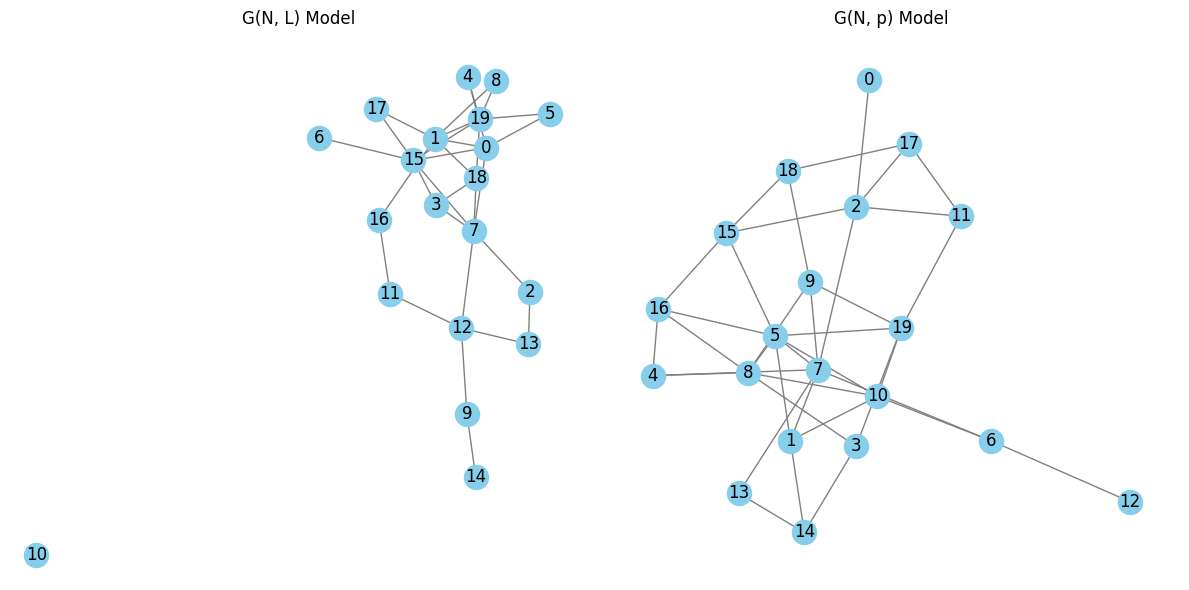

In [7]:
# Parameters
N = 20  
L = 30
p = 0.2 

G_NL = nx.gnm_random_graph(N, L)

G_Np = nx.gnp_random_graph(N, p)

plt.figure(figsize=(12, 6))

plt.subplot(121)
nx.draw(G_NL, with_labels=True, node_size=300, node_color="skyblue", edge_color="gray")
plt.title("G(N, L) Model")

plt.subplot(122)
nx.draw(G_Np, with_labels=True, node_size=300, node_color="skyblue", edge_color="gray")
plt.title("G(N, p) Model")

plt.tight_layout()
plt.show()

To construct a random network, we follow these steps:

1. Start with $N$ isolated nodes.
2. Select a node pair and generate a random number between 0 and 1. If the number is smaller then $p$, connect the selected node pair with a link; otherwise, leave them disconnected.
3. Repeat step (2) for each of the $\frac{N(N-1)}{2}$ node pairs.

The probability that a random network has exactly $L$ links is the product of three terms:

1. The probability that $L$ of the attempts to connect the $\frac{N(N-1)}{2}$ pairs of nodes have resulted in a link, which is $p^L$.
2. The probability that the remaining $\frac{N(N-1)}{2} - L$ attempts have not resulted in a link, which is $(1-p)^{\frac{N(N-1)}{2} - L}$.
3. A combinational factor, $\binom{\frac{N(N-1)}{2}}{L}$ counting the number of different ways we can place $L$ links among $\frac{N(N-1)}{2}$ node pairs.

We can therefore write the probability that a particular realization of a random network has exactly $L$ links as

$$
P_L = \binom{\frac{N(N-1)}{2}}{L} p^L (1-p)^{\frac{N(N-1)}{2} - L} \quad 
$$

A binomial distribution, the expected number of links in a random graph is

$$
\langle L \rangle = \sum_{L=0}^{\frac{N(N-1)}{2}} L P_L = p \frac{N(N-1)}{2} \quad 
$$

Hence $\langle L \rangle$ is the product of the probability $p$ that two nodes are connected and the number of pairs we attempt to connect, which is $L_{\text{max}} = \frac{N(N - 1)}{2}$.

The average degree of a random network

$$
\langle k \rangle = \frac{2 \langle L \rangle}{N} = p (N-1) \quad 
$$

Hence $\langle k \rangle$ is the product of the probability $p$ that two nodes are connected and $N-1$, which is the maximum number of links a node can have in a network of size $N$.

#### Clustering Coefficient

To calculate $C_i$ for a node in a random network, we need to estimate the expected number of links $L_i$ between the node’s $k_i$ neighbors. In a random network, the probability that two of $i$’s neighbors link to each other is $p$. As there are $\frac{k_i(k_i - 1)}{2}$ possible links between the $k_i$ neighbors of node $i$, the expected value of $L_i$ is

$$
\langle L_i \rangle = p \frac{k_i(k_i - 1)}{2} \quad 
$$

Thus, the local clustering coefficient of a random network is

$$
C_i = \frac{2 \langle L_i \rangle}{k_i(k_i - 1)} = p = \frac{\langle k \rangle}{N} \quad
$$

This equation makes two predictions:

1. For fixed $\langle k \rangle$, the larger the network, the smaller a node’s clustering coefficient. Consequently, a node's local clustering coefficient $C_i$ is expected to decrease as $1/N$.
2. The local clustering coefficient of a node is independent of the node’s degree.

## Percolation in random networks

Consider the following procedure: 

For a given random network, randomly removing a fraction $1 - r$ of the links corresponds to changing the average degree $\langle k \rangle$ to $\langle k_{diluted} \rangle = \langle k \rangle r$ in the diluted network. Where $r$ is probability between 0 to 1.

The critical probability for the emergence of a giant component is:

$$
r_c = \frac{1}{\langle k \rangle}
$$

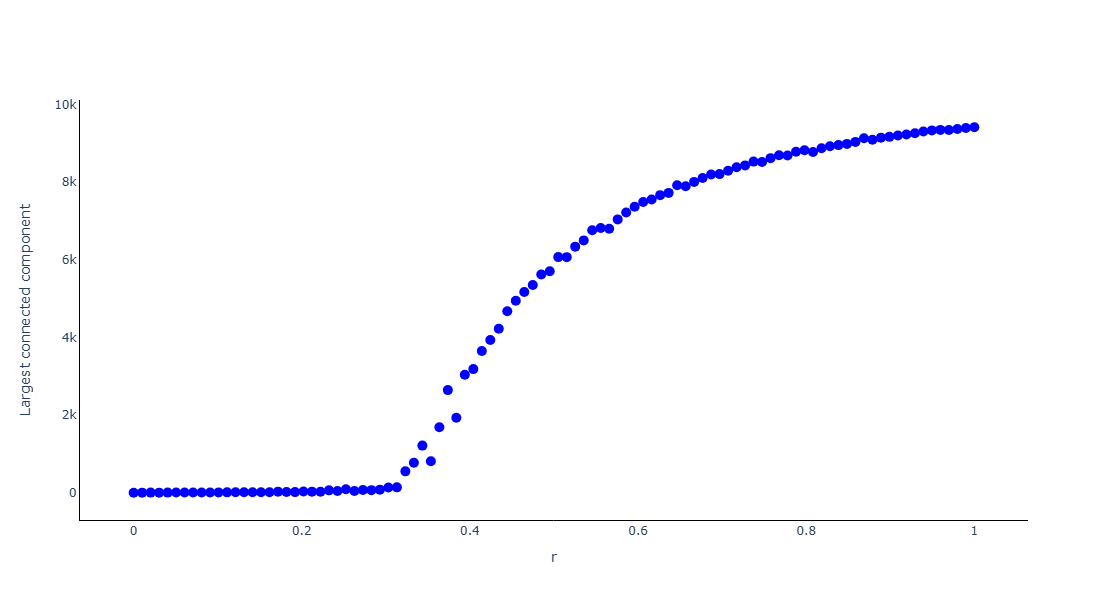

In [8]:
N = 10000
p = 3/(N-1) 
r_values = np.linspace(0, 1, 100)  

def percolation(G, r):
    # Remove 1 - r fraction of the nodes
    num_edges_to_remove = int((1 - r) * len(G.edges()))
    edges = list(G.edges())
    random.shuffle(edges)
    
    for i in range(num_edges_to_remove):
        G.remove_edge(*edges[i])
    
    # Find the size of the largest connected component
    if len(G.edges()) == 0:
        return 0
    else:
        largest_cc = max(nx.connected_components(G), key=len)
        return len(largest_cc)

largest_cc_sizes = []

G_initial = nx.gnp_random_graph(N, p)

for r in r_values:
    G = G_initial.copy()
    largest_cc_size = percolation(G, r)
    largest_cc_sizes.append(largest_cc_size)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=r_values,
    y=largest_cc_sizes,
    mode='markers',
    marker=dict(color='blue', size=10),
))

fig.update_layout(
    width=600,
    height=600,
    xaxis=dict(
        title='r',
        showline=True,
        linecolor='black',
        gridcolor='white'  
    ),
    yaxis=dict(
        title='Largest connected component',
        showline=True,
        linecolor='black',
        gridcolor='white'  
    ),
    plot_bgcolor='white'
)

fig.show()

The critical value of $r_c$ according to theory in our case is given by:

$$
r_c = \frac{1}{\langle k \rangle} = \frac{1}{p(N - 1)} = \frac{1000 - 1}{3(1000 - 1)} \approx 0.33
$$